# Statusmøde 1
<font size="2"> *Gennemgang af de første 2 uger med Charlotte, Claus og Kasper* </font>  

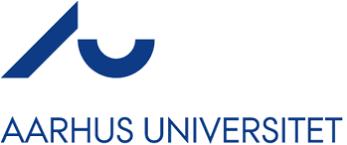

3 overordnede fokuspunkter

<details>
    <summary><b>Overblik over status</b></summary>
    <ul>
        <li>Læse dokumenter fra Epinion undersøgelse og CED</li>
        <li>Gennemgang af alle kurser på kursuskataloget</li>
    </ul>
     <div style="display: inline-block; vertical-align: top;">
        <img src="Fysisk biokemi.png" width="500" height="250">
    </div>
    <div style="display: inline-block; vertical-align: top;">
        <img src="Genetik.png" width="500" height="250">
    </div>
     <ul>
        <li>23 ud af 36 nuværende kurser har ikke noget bioinformatisk eller "fag-digitalt" nævnt i kursusbeskrivelsen.</li>
    </ul>
    
</details>

<details>
    <summary><b>Se ud i verden</b></summary>
    <ul>
        <li>Gennemgang af eksisterende litteratur fra universiteter i udlandet
            <ul>
                <li>Tysk arbejdsgruppe</li>
                <li>Amerikanske universiteter og netværk</li>
                    <ul>
                        <li>NIBLSE <i>(Network for integrating bioinformatics into life sciences education)</i></li>
                        <li>University of Wisconsin-La Crosse</li>
                        <li>Kalamazoo College (Michigan)</li>
                    </ul>
                <li> <i> Ongoing.... </i> </li>
            </ul>
        </li>
    </ul>
    
</details>

<details>
    <summary><b>Jupyter og Python</b></summary>
    <ul>
        <li>Genopfriskning af Python med kursus</li>
        <li>Læst op på forskellige Python IDEs (integrated development environments)</li>
            <ul>
                <li>Google Colab</li>
                <li>PyCharm</li>
                <li>Visual Studio Code</li>
                <li><b>JupyterLab</b></li>
            </ul>
        <li>JupyterLab</li>
            <ul>
                <li>Let tilgængeligt - især med Anaconda Navigator</li>
                <li>Interaktivt - hvilket opfordrer til eksperimentering</li>
                <li>Visuelt - og med billeder HTML i samme dokument</li>
                <li>Samme platform kan bruges, først med Python og senere med R</li>
            </ul>
    </ul>
    
</details>

# Machine learning eksempel

## Step 1: Imports
Herunder importerer jeg hhv. data pakker, machine learning pakker og model visualiseringspakkera


In [ ]:
#Data wrangling imports
import pandas as pd
import numpy as np
#Machine Learning Models Imports
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
#Model Evaluation Imports and Visualization
from matplotlib import pyplot as plt
import graphviz

## Step 2: Load training data
Her indlæser jeg et datasæt med data på **40 counties** i California og deres tilhørende data der er relateret til COVID. De sidste **18 counties** mangler vi data på og **derfor** vil vi gerne lave denne model.

In [ ]:
#Her indlæser jeg datasættet med de 40 counties som jeg kender al data for
S2020_training = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_training.csv")
S2020_training.head()

## Step 3: Kategoriser data som Label og Features
Label er den værdi vi gerne vil forudsige og Features er al den data der kan give os viden om den forudsigelse.
Det kan ses på nedenstående billede.
<img src="Label-and-Features.jpg" width = "500" height = "250">

In [ ]:
#Her sorterer vi kolonnen med COVID tilfælde
S2020_training_labels = S2020_training["cases_per_100000"]

#Her sorterer vi alle de andre kolonner, ved at fjerne både county og cases
S2020_training_features = S2020_training.drop(columns=["county", "cases_per_100000"])

## Step 4: Lav et decision tree

In [ ]:
dtr_summer2020 = DecisionTreeRegressor(random_state = 1, max_depth=5)
dtr_summer2020 = dtr_summer2020.fit(S2020_training_features, S2020_training_labels)

## Step 5: Visualiser decision tree

In [ ]:
#Lav visualering af decision tree
dtr_summer2020_dot = tree.export_graphviz(dtr_summer2020, out_file=None, 
                                          feature_names=S2020_training_features.columns, 
                                          filled=False, rounded=False, impurity=False)

#Optegn selve træet
dtr_graph = graphviz.Source(dtr_summer2020_dot, format="png")
dtr_graph

## Step 6: Brug decision tree på vores testing data

In [ ]:
#Indlæs testing data som er de 18 counties hvor vi ikke kender COVID raten
S2020_testing_features = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_test_features.csv")
S2020_features_test_nocounty = S2020_testing_features.drop(columns=["county"])
S2020_labels_pred = dtr_summer2020.predict(S2020_features_test_nocounty)

In [ ]:
#Vi laver de forudsagte værdier til et dataframe
S2020_labels_preds_df = pd.DataFrame(S2020_labels_pred, columns=["Predicted"])
S2020_labels_preds_df = pd.concat([S2020_testing_features["county"].reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)],axis=1)
S2020_labels_preds_df.round(3)

## Step 7: Hvor godt klarede vores model sig?

Vi starter med at indlæse det reelle data så vi kan sammenligne med det forudsagte data.

In [ ]:
S2020_testing_labels = pd.read_csv("https://raw.githubusercontent.com/MarcMachineLearning/Workshop_1/main/Datasets/S2020_test_labels.csv")
S2020_testing_labels = S2020_testing_labels.drop(columns=["county"])

In [ ]:
#Vi samler de forudsagte værdier med de reele værdier
pred_vs_test_2020 = pd.concat([S2020_testing_labels.reset_index(drop=True),S2020_labels_preds_df.reset_index(drop=True)], axis=1)

#Vi opstiller et søjlediagram
pred_vs_test_plot = pred_vs_test_2020.plot.barh(color={"Predicted": "orange", "cases_per_100000": "darkblue"}, x= "county",figsize=(15,15), yticks=np.arange(0,4000,500))

## Step 8: Eksporter nyt data

In [ ]:
pred_vs_test_2020.to_csv("Pred_vs_test_2020.csv", sep = ";", decimal = ",")

# Widgets (nu i 2 forskellige versioner)
1. version (som jeg viste på mødet): 

fra følgende promt til Chat GPT: "Can you provide the code for an interactive normal distribution visualization in Jupyter Notebook?"

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

def plot_normal_distribution(mean, variance):
    x = np.linspace(-10, 10, 1000)
    y = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=f'N({mean}, {variance})')
    plt.title('Normal Distribution')
    plt.xlabel('X-axis')
    plt.ylabel('Probability Density Function')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create interactive widgets for mean and variance
mean_widget = widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean')
variance_widget = widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Variance')

# Create the interactive plot
interact(plot_normal_distribution, mean=mean_widget, variance=variance_widget)

interactive(children=(FloatSlider(value=0.0, description='Mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…

<function __main__.plot_normal_distribution(mean, variance)>

2. version: 

Her har jeg leget med ChatGPT for at lave en lidt lækrere model der har integreret mulighed for at gemme som enten HTML eller SVG (scalable vector graphic) fil.
Man kan lege med de to parametre og når man er klar trykker man på en af gem knapperne og får den aktuelle version af grafen som en fil kaldet "interaktiv_normal".

In [28]:
import numpy as np
import plotly.graph_objs as go
from ipywidgets import interact, widgets, HBox
from plotly.subplots import make_subplots
from plotly.io import to_image

@interact(mean=widgets.FloatSlider(value=0, min=-5, max=5, step=0.1, description='Mean'),
          variance=widgets.FloatSlider(value=1, min=0.1, max=5, step=0.1, description='Variance'))
def plot_normal_distribution(mean, variance):
    x = np.linspace(-10, 10, 1000)
    y = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-(x - mean)**2 / (2 * variance))

    # Create a plotly figure
    fig = make_subplots(rows=1, cols=1)

    # Add a trace for the normal distribution
    trace = go.Scatter(x=x, y=y, mode='lines', name=f'N({mean}, {variance})')
    fig.add_trace(trace)

    # Update layout
    fig.update_layout(title_text='Normal Distribution',
                      xaxis_title='X-axis',
                      yaxis_title='Probability Density Function')

    # Show the figure
    fig.show()

    # Create Save as HTML button
    html_button = widgets.Button(description='Save as HTML')
    html_button.on_click(lambda x: save_plot(fig, format='html'))

    # Create Save as SVG button
    svg_button = widgets.Button(description='Save as SVG')
    svg_button.on_click(lambda x: save_plot(fig, format='svg'))

    # Display buttons
    display(HBox([html_button, svg_button]))

def save_plot(fig, format):
    if format not in ['html', 'svg']:
        print(f"Unsupported format: {format}")
        return

    # Specify the predefined file name
    if format == 'html':
        file_name = 'interaktiv_normal.html'
        file_content = fig.to_html(full_html=False)
    elif format == 'svg':
        file_name = 'interaktiv_normal.svg'
        file_content = to_image(fig, format=format, engine='orca')

    with open(file_name, 'wb') as f:
        f.write(file_content)

interactive(children=(FloatSlider(value=0.0, description='Mean', max=5.0, min=-5.0), FloatSlider(value=1.0, de…